# **Simulação de Carteiras**

# 1. Importação das bibliotecas

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

# 2. Configurar a nossa carteira

In [37]:
compras = {'PRIO3.SA': 1200, 'KEPL3.SA': 800,
           'GGBR4.SA': 800, 'BPAC11.SA': 1200,
           'HYPE3.SA': 800, 'MILS3.SA': 800,
           'BTLG11.SA': 1000, 'VRTA11.SA': 1000}

In [ ]:
#Para acessar as chaves
compras.keys()

In [20]:
#Para acessar os valores
compras.values()

dict_values([1200, 800, 800, 1200, 800, 800, 1000, 1000])

In [38]:
list(compras.keys())

['PRIO3.SA',
 'KEPL3.SA',
 'GGBR4.SA',
 'BPAC11.SA',
 'HYPE3.SA',
 'MILS3.SA',
 'BTLG11.SA',
 'VRTA11.SA']

In [23]:
sum(compras.values())

7600

# 3. Importando os dados

In [33]:
#As datas tem que estar no formato americano
inicio = '2020-01-01'
fim = '2023-07-01'

In [56]:
precos = yf.download(list(compras.keys()), start=inicio, end = fim, progress = False)['Adj Close']

# 4. Simulação da carteira

In [43]:
primeiropreco = precos.iloc[0] #Traz os preços do início

In [49]:
#Transformando em dataframe
compras_df = pd.Series(data = compras, index = list(compras.keys())) # colocar o index para dizer que os tickers são índices

Quantidade de papéis comprados de cada ativo

In [53]:
qtd_acoes = round(compras_df/primeiropreco, 0)

In [107]:
PL = precos*qtd_acoes # tabela com os precos das ações ao longo do tempo multiplicado pela quantidade de ações

In [110]:
PL['PL Total'] = PL.sum(axis = 1) #somando o valor ao longo das colunas

In [ ]:
PL.head()

In [ ]:
PL.tail()

# 5. Comparação com o IBOV

In [ ]:
ibov = yf.download('^BVSP', start = inicio, end = fim)['Adj Close'] # Adj close para usar só os dados do fechamento

In [ ]:
ibov.head()

In [120]:
ibov = pd.DataFrame(ibov)

In [121]:
ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)

Juntando tudo num dataframe só

In [123]:
consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date') #Unir o que há em comum entre os dataframes: a data

In [ ]:
consolidado.head()
#dados estão desajustados: ibov com os valores dos papéis????

Normalizando os dados para ajustar a escala

In [125]:
consolidado_ajustado = consolidado/consolidado.iloc[0]

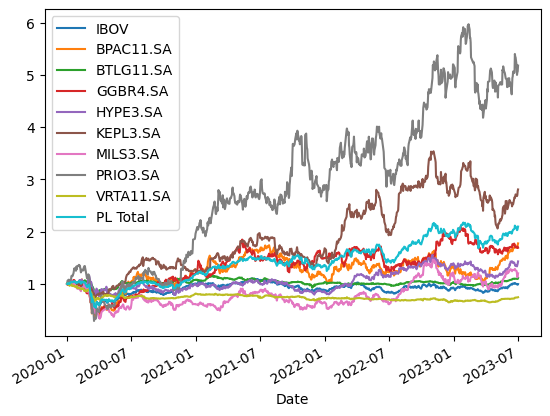

In [126]:
consolidado_ajustado.plot();

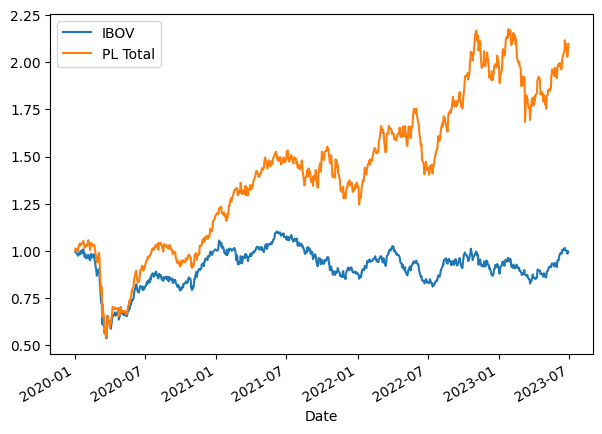

In [129]:
consolidado_ajustado[['IBOV', 'PL Total']].plot(figsize = (7,5));

# 6. Função para testar carteiras

In [130]:
def simulacao_carteira(inicio, fim, carteira):
  precos = yf.download(list(carteira.keys()), start = inicio, end = fim, progress = False)['Adj Close']
  primeiro = precos.iloc[0]
  compras_df = pd.Series(data = carteira, index = list(carteira.keys()))
  qtd_acoes = compras_df/primeiro
  qtd_acoes = round(qtd_acoes,0)
  PL = precos*qtd_acoes
  PL['PL Total'] = PL.sum(axis = 1)
  ibov = yf.download('^BVSP', start = inicio, end =  fim, progress = False)
  ibov.rename(columns = {'Adj Close': 'IBOV'}, inplace = True)
  ibov.drop(ibov.columns[[0,1,2,3,5]], axis = 1, inplace = True)
  consolidado = pd.merge(ibov, PL, how = 'inner', on = 'Date')
  consolidado_adj = consolidado/consolidado.iloc[0]
  consolidado_adj[['IBOV', 'PL Total']].plot(figsize = (8,6));